In [1]:
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import csv

filename = "puros.csv"
f = open(filename, "w")
headers= "Nombre, Rating, Country, Body, Day, Year, Size\n"
f.write(headers)

years= range(2012,2018,1)
urls=[]
record=[]
for year in years:
    print("https://www.cigaraficionado.com/top25/"+str(year))
    urls.append("https://www.cigaraficionado.com/top25/"+str(year))
    for url in urls:
        pagina = requests.get(url)
        sopa= soup(pagina.text,'html.parser')
        info = sopa.findAll("div",{"class":"ratings-results_container"})
    for i in info:
        nombre= i.img["alt"]
        score= i.find("div",{"class":"score-number"}).text
        pais= i.findAll("span",{"style":"color:black;"})
        cadena=""
        for p in pais:
            cadena+=p.text+','
        record.append((nombre, score, cadena))
        f.write(nombre +","+ score + "," + cadena + "\n" )
    
f.close()

https://www.cigaraficionado.com/top25/2012
https://www.cigaraficionado.com/top25/2013
https://www.cigaraficionado.com/top25/2014
https://www.cigaraficionado.com/top25/2015
https://www.cigaraficionado.com/top25/2016
https://www.cigaraficionado.com/top25/2017


In [2]:
record

[('Flor de las Antillas Toro',
  '96',
  'Nicaragua,Medium-Full,CA • January 1, 2013,Corona Gorda,'),
 ('Cohiba 1966 Edición Limitada 2011',
  '95',
  'Cuba,Medium,CA • January 1, 2013,Corona Gorda,'),
 ('Romeo by Romeo Y Julieta Piramide',
  '94',
  'Dominican Republic,Medium-Full,CA • January 1, 2013,Figurado,'),
 ('Padrón Family Reserve 85 Years Natural',
  '94',
  'Nicaragua,Medium,CA • January 1, 2013,Robusto,'),
 ('Arturo Fuente Rosado Sungrown Magnum R Vitola "Forty-Four"',
  '94',
  'Dominican Republic,Medium,CA • January 1, 2013,Robusto,'),
 ('H. Upmann Royal Robusto',
  '94',
  'Cuba,Medium,CA • January 1, 2013,Robusto,'),
 ('Ashton Heritage Puro Sol Belicoso No. 2',
  '94',
  'Dominican Republic,Mild-Medium,CA • January 1, 2013,Figurado,'),
 ('Rocky Patel Fifty Robusto',
  '93',
  'Nicaragua,Medium-Full,CA • January 1, 2013,Corona Gorda,'),
 ('Tatuaje Cojonu 2012 Sumatra',
  '93',
  'Nicaragua,Medium-Full,CA • January 1, 2013,Corona Gorda,'),
 ('Nat Sherman Timeless Collecti

In [3]:
df = pd.read_csv('puros.csv', header=0, index_col=False, sep=",")

In [4]:
df

,Nombre,Rating,Country,Body,Day,Year,Size
0,Flor de las Antillas Toro,96,Nicaragua,Medium-Full,CA • January 1,2013,Corona Gorda
1,Cohiba 1966 Edición Limitada 2011,95,Cuba,Medium,CA • January 1,2013,Corona Gorda
2,Romeo by Romeo Y Julieta Piramide,94,Dominican Republic,Medium-Full,CA • January 1,2013,Figurado
3,Padrón Family Reserve 85 Years Natural,94,Nicaragua,Medium,CA • January 1,2013,Robusto
4,Arturo Fuente Rosado Sungrown Magnum R Vitola ...,94,Dominican Republic,Medium,CA • January 1,2013,Robusto
5,H. Upmann Royal Robusto,94,Cuba,Medium,CA • January 1,2013,Robusto
6,Ashton Heritage Puro Sol Belicoso No. 2,94,Dominican Republic,Mild-Medium,CA • January 1,2013,Figurado
7,Rocky Patel Fifty Robusto,93,Nicaragua,Medium-Full,CA • January 1,2013,Corona Gorda
8,Tatuaje Cojonu 2012 Sumatra,93,Nicaragua,Medium-Full,CA • January 1,2013,Corona Gorda
9,Nat Sherman Timeless Collection No. 2,93,Dominican Republic,Medium-Full,CA • January 1,2013,Figurado


In [5]:
#Since there are blank spaces we strip them off
df.columns = [c.strip() for c in list(df.columns.values)]

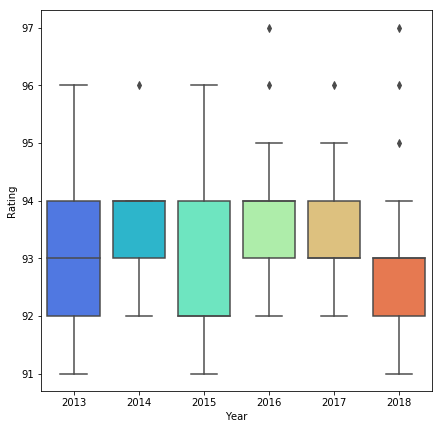

In [6]:
plt.subplots(figsize=(7,7))
sns.boxplot(x = "Year", y = "Rating", data = df, palette='rainbow')

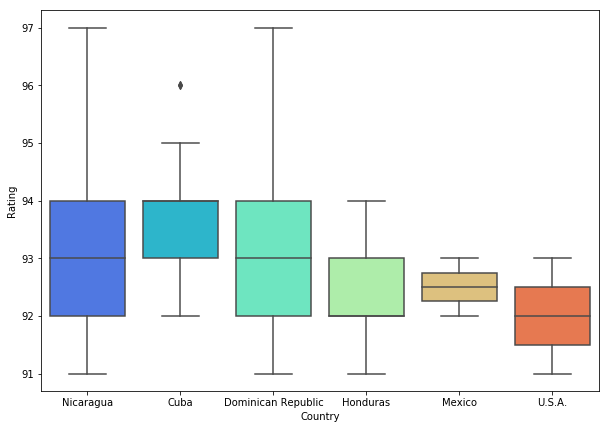

In [7]:
plt.subplots(figsize=(10,7))
sns.boxplot(x = "Country", y = "Rating", data = df, palette='rainbow')

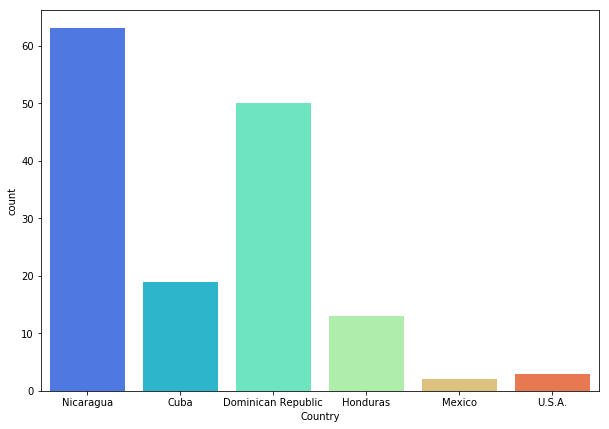

In [8]:
plt.subplots(figsize=(10,7))
sns.countplot(x = "Country", data = df, palette='rainbow')

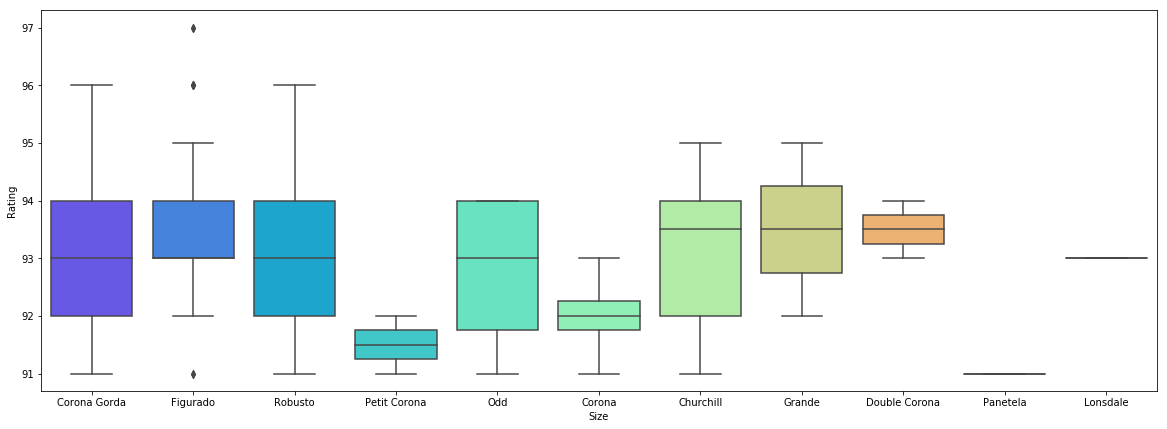

In [9]:
plt.subplots(figsize=(20,7))
sns.boxplot(x = "Size", y = "Rating", data = df, palette='rainbow')

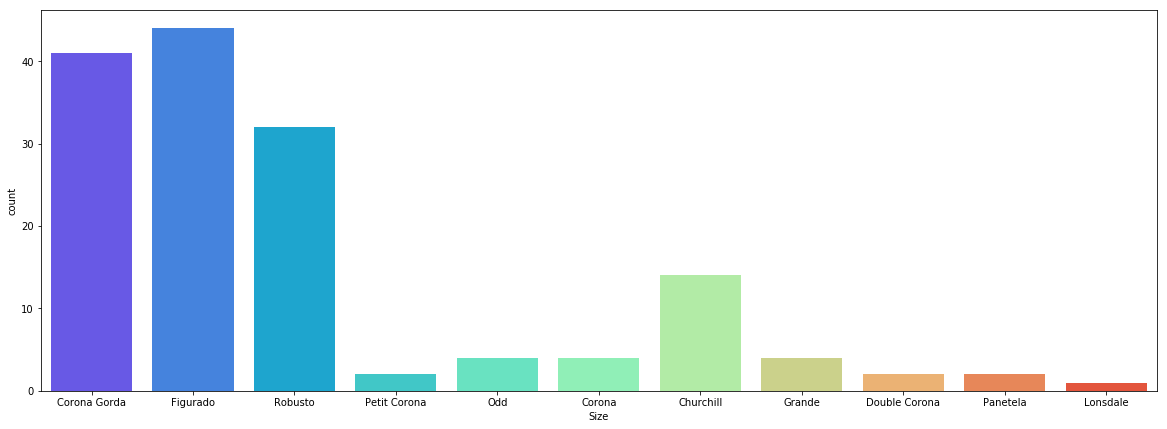

In [10]:
plt.subplots(figsize=(20,7))
sns.countplot(x = "Size", data = df, palette='rainbow')

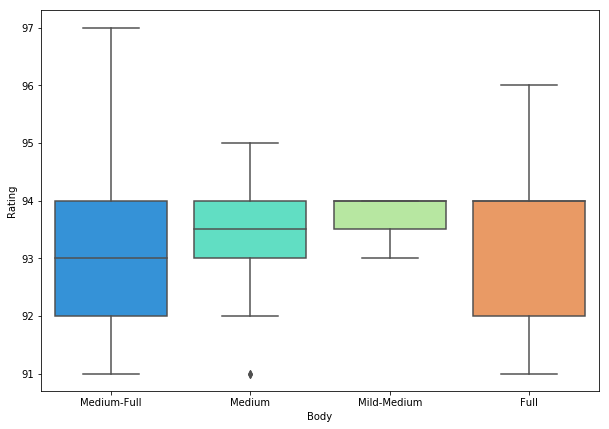

In [11]:
plt.subplots(figsize=(10,7))
sns.boxplot(x = "Body", y = "Rating", data = df, palette='rainbow')

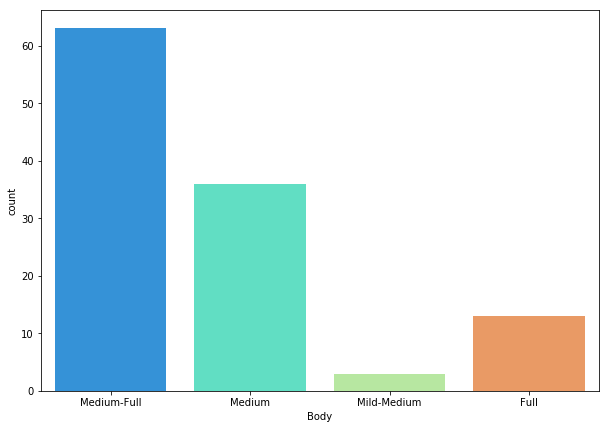

In [12]:
plt.subplots(figsize=(10,7))
sns.countplot(x = "Body", data = df, palette='rainbow')